In [1]:
#第4章準備

import MeCab
import ipadic

mecab = MeCab.Tagger(ipadic.MECAB_ARGS)  # 簡単にipadicを使う方法(https://zenn.dev/yasude/articles/aa28d7ab20b2f1823d4b)

with open("./work/neko.txt.mecab", "w") as fo:  # 書き込むファイルとしてneko.txt.mecabを呼び出し
    for line in open("./data/neko.txt"):  # neko.txtを読み込みファイルとして、1行ずつ読み込んでいく
        fo.write(mecab.parse(line))  # mecabの実行はmecab.parse()で行う

In [2]:
!cat -n ./work/neko.txt.mecab | head -50  # mecab.txt.mecabの最初の15行を表示

     1	一	名詞,数,*,*,*,*,一,イチ,イチ
     2	EOS
     3	EOS
     4	　	記号,空白,*,*,*,*,　,　,　
     5	吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
     6	は	助詞,係助詞,*,*,*,*,は,ハ,ワ
     7	猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
     8	で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
     9	ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
    10	。	記号,句点,*,*,*,*,。,。,。
    11	EOS
    12	名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
    13	は	助詞,係助詞,*,*,*,*,は,ハ,ワ
    14	まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
    15	無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
    16	。	記号,句点,*,*,*,*,。,。,。
    17	EOS
    18	EOS
    19	　	記号,空白,*,*,*,*,　,　,　
    20	どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
    21	で	助詞,格助詞,一般,*,*,*,で,デ,デ
    22	生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
    23	た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
    24	か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
    25	とんと	副詞,一般,*,*,*,*,とんと,トント,トント
    26	見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー
    27	が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
    28	つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
    29	ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
    30	。	記号,句点,*,*,*,*,。,。,。
    31	EOS
    32	何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ
    33	でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ
    34	薄暗い	形

In [1]:
#30. 形態素解析結果の読み込み

import re
import pprint

with open("./work/neko.txt.mecab") as f:
    morph = {}  # morphは各単語の形態素を表す
    sentence = []  # sentenceは１つの文を表す
    novel = []  # novelは全てのsentenceの集合,すなわち小説を表す

    for line in f:
        #MeCabの出力フォーマットは"表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音"
        #この出力フォーマットにしたがって各単語の形態素をリスト化
        word = re.split("\t|,", line.rstrip("\n"))  
        
        
        if word[0] != "EOS":  # 表層形が"EOS"のところは無視したいので,if文を使う
            #それぞれのキーに応じて値を格納
            morph["surface"] = word[0]
            morph["base"] = word[7]
            morph["pos"] = word[1]
            morph["pos1"] = word[2]
            
            sentence.append(morph)  #文を表すsentenceに単語を入れていく
            morph = {}  # sentenceに格納したらmorphを初期化
        else:
            if len(sentence) > 0:  #表層形が"EOS"だったらこちらに分岐。sentenceに何も入っていない時はnovelにappendする必要がないので、if文を使う
                novel.append(sentence)  #表層形が"EOS"ということは文の終わりということなので、sentenceをnovelにappendして初期化
                sentence = []

for i in range(10):
    pprint.pprint(novel[i], sort_dicts=False)  # novelの最初の要素10個、すなわち最初の10文を出力


[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': '生れ

In [5]:
#31. 動詞   #上で作ったnovelを全く活用しなかった方。活用したのは下にある。

import re
import pprint

with open("./work/neko.txt.mecab") as f:
    VerbList = []
    for line in f:
        word = re.split("\t|,", line.rstrip("\n"))  
        
        if word[0] != "EOS" and word[1] == "動詞":  # 表層形が"EOS"でないかつ品詞が動詞であるときVervListに表層形をappend
            
            VerbList.append(word[0])

for i in range(10):
    print(VerbList[i])


print("------------\n動詞の合計数：{}".format(len(VerbList)))

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
------------
動詞の合計数：28905


In [5]:
#31. 動詞
VerbList = []

for i in range(len(novel)):
    for j in range(len(novel[i])):
        if novel[i][j]["pos"] == "動詞":
            VerbList.append(novel[i][j]["surface"])

            
for i in range(10):
    print(VerbList[i])


print("------------\n動詞の合計数：{}".format(len(VerbList)))

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
------------
動詞の合計数：28905


In [6]:
#32. 動詞の基本形 #上で作ったnovelを全く活用しなかった方。活用したのは下にある。

import re
import pprint

with open("./work/neko.txt.mecab") as f:
    VerbBaseList = []
    for line in f:
        word = re.split("\t|,", line.rstrip("\n"))  
        
        
        if word[0] != "EOS" and word[1] == "動詞":  # 表層形が"EOS"でないかつ品詞が動詞であるときVervListに原形をappend
            VerbBaseList.append(word[7])

for i in range(10):
    print(VerbBaseList[i] + "\t・・・\t表層形は 「{}」".format(VerbList[i]))


print("------------\n動詞の合計数：{}".format(len(VerbBaseList)))

生れる	・・・	表層形は 「生れ」
つく	・・・	表層形は 「つか」
する	・・・	表層形は 「し」
泣く	・・・	表層形は 「泣い」
する	・・・	表層形は 「し」
いる	・・・	表層形は 「いる」
始める	・・・	表層形は 「始め」
見る	・・・	表層形は 「見」
聞く	・・・	表層形は 「聞く」
捕える	・・・	表層形は 「捕え」
------------
動詞の合計数：28905


In [7]:
#32. 動詞の基本形

VerbBaseList = []

for i in range(len(novel)):
    for j in range(len(novel[i])):
        if novel[i][j]["pos"] == "動詞":
            VerbBaseList.append(novel[i][j]["base"])

            
for i in range(10):
    print(VerbBaseList[i] + "\t・・・\t表層形は 「{}」".format(VerbList[i]))


print("------------\n動詞の合計数：{}".format(len(VerbBaseList)))

生れる	・・・	表層形は 「生れ」
つく	・・・	表層形は 「つか」
する	・・・	表層形は 「し」
泣く	・・・	表層形は 「泣い」
する	・・・	表層形は 「し」
いる	・・・	表層形は 「いる」
始める	・・・	表層形は 「始め」
見る	・・・	表層形は 「見」
聞く	・・・	表層形は 「聞く」
捕える	・・・	表層形は 「捕え」
------------
動詞の合計数：28905


In [8]:
#33. AのB

Patterns = []

for i in range(len(novel)):
    for j in range(len(novel[i]) - 2):
        if novel[i][j]["pos"] == "名詞" and novel[i][j + 1]["surface"] == "の" and novel[i][j + 2]["pos"] == "名詞":  #「名詞」「の」「名詞」にマッチ
            pattern = novel[i][j]["surface"] + novel[i][j + 1]["surface"] + novel[i][j + 2]["surface"]  # 変数patternに追加
            Patterns.append(pattern)  # patternを集めた変数Patternsに追加

            
for i in range(30):
    print(Patterns[i])

print("------------\n「AのB」というパターンの合計数：{}".format(len(Patterns)))

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔
------------
「AのB」というパターンの合計数：6042


In [9]:
#34. 名詞の連接
#このコードは失敗作。３つ以上の名詞が連接されているときに後ろの２つの名詞の連接も抽出されてしまっている。

Patterns = []
pattern = ""
counter = 0
for i in range(len(novel)):
    for j in range(len(novel[i])):
        if novel[i][j]["pos"] == "名詞":
            pattern += novel[i][j]["surface"]
            counter += 1
            while j < len(novel[i]) - 1:
                if novel[i][j + 1]["pos"] == "名詞":
                    pattern += novel[i][j + 1]["surface"]
                    
                    counter += 1
                    j += 1
                else:
                    if counter > 1:
                        Patterns.append(pattern)  # patternを集めた変数Patternsに追加
                    break
        
        pattern = ""
        counter = 0
        
            
for i in range(30):
    print(Patterns[i])

print("------------\nパターンの合計数：{}".format(len(Patterns)))


人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
------------
パターンの合計数：9142


In [10]:
#34. 名詞の連接

Patterns = []
pattern = ""
counter = 0
for i in range(len(novel)):
    j = 0
    while j < len(novel[i]):
        if novel[i][j]["pos"] == "名詞":
            pattern += novel[i][j]["surface"]
            counter += 1
        else:
            if counter > 1:
                Patterns.append(pattern)  # patternを集めた変数Patternsに追加
            counter = 0
            pattern = ""
        
        j += 1

        
            
for i in range(30):
    print(Patterns[i])

print("------------\nパターンの合計数：{}".format(len(Patterns)))

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
神経胃弱性
------------
パターンの合計数：7200


In [11]:
##乾研解説資料のコードで実行してみた結果、名詞の連接の個数が解説サイトのものと異なっている？

# mecab で解析した結果を１行受け取り，表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとする辞書を返す関数
def read_parsed_line(line):
    surface, info = line.split("\t")
    info_lis = info.split(",")
    return {'surface': surface, 'base': info_lis[6], 'pos': info_lis[0], 'pos1': info_lis[1]}

# mecab で解析したファイルから１文ごとに "形態素辞書のリスト" を作成して，順次出来上がったリストを返す関数
def make_morph_sent(parsed_file_path):
    morph_sent_lis = []
    
    for line in open(parsed_file_path):
        # EOS(文の境界)でなければ形態素辞書をリストに追加
        if line.strip() != "EOS":
            morph_sent_lis.append(read_parsed_line(line))
        
        # EOS(文の境界)がきたらリストを返し，リストを初期化
        elif morph_sent_lis:
            yield morph_sent_lis  # return ではなく yield を使うことで出来上がったリストを順次返す
            morph_sent_lis = []

# 10文目までの出力を確認
# for _, morph_sent in zip(range(10), make_morph_sent("./work/neko.txt.mecab")):
#     print(morph_sent)

# 外部ライブラリ itertools の便利な関数 groupby() を使う方法
from itertools import groupby
longest_nouns_lis = []

for morph_sent in make_morph_sent("./work/neko.txt.mecab"):
    # groupby() は与えられたオブジェクトに対し，各要素が条件 (引数 "key") を満たすかどうかでグループ分けする関数
    for is_noun, morphs in groupby(morph_sent, key = lambda w: w["pos"]=="名詞"):   # ラムダ式で条件関数を渡す
        morphs = list(morphs)
        if is_noun and len(morphs) > 1:
            longest_nouns_lis.append("".join(m["surface"] for m in morphs))
print("名詞の連接の数:", len(longest_nouns_lis))
print("名詞の連接の例:", longest_nouns_lis[:30])

名詞の連接の数: 7200
名詞の連接の例: ['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '神経胃弱性']


In [12]:
#35. 単語の出現頻度(記号等含む全単語)

import pprint

WordFreqDic = {}
for i in range(len(novel)):
    for j in range(len(novel[i])):
        if novel[i][j]["base"] != "*":
            word = novel[i][j]["base"]
            if word not in WordFreqDic:
                WordFreqDic[word] = 1
            else:
                WordFreqDic[word] += 1
        elif novel[i][j]["base"] == "*":
            word = novel[i][j]["surface"]
            if word not in WordFreqDic:
                WordFreqDic[word] = 1
            else:
                WordFreqDic[word] += 1            

SortedDic = dict(sorted(WordFreqDic.items(), key=lambda x:x[1], reverse=True))

counter = 0
for k, v in SortedDic.items():
    if counter < 30:
        print(k + "\t: " + str(v))
        counter += 1
    else:
        break

の	: 9194
。	: 7486
て	: 6848
、	: 6772
は	: 6420
に	: 6243
を	: 6071
だ	: 5975
と	: 5508
が	: 5337
た	: 4267
する	: 3657
「	: 3231
」	: 3225
ない	: 3052
も	: 2479
ある	: 2320
で	: 2081
から	: 2031
いる	: 1777
ん	: 1568
か	: 1529
云う	: 1408
事	: 1207
です	: 1164
ます	: 1146
なる	: 1120
へ	: 1034
う	: 987
もの	: 981


In [13]:
#35. 単語の出現頻度(記号と助詞は含まない)

import pprint

WordFreqDic = {}
for i in range(len(novel)):
    for j in range(len(novel[i])):
        if (novel[i][j]["pos"] != "記号") and (novel[i][j]["pos"] != "助詞") and (novel[i][j]["base"] != "*"):
            word = novel[i][j]["base"]
            if word not in WordFreqDic:
                WordFreqDic[word] = 1
            else:
                WordFreqDic[word] += 1
        elif novel[i][j]["base"] == "*":  # 「ぷうぷうと」などの単語のbaseは「＊」なので、それは別にここで処理。そうしないと単語上位に「＊」が来てしまう
            word = novel[i][j]["surface"]
            if word not in WordFreqDic:
                WordFreqDic[word] = 1
            else:
                WordFreqDic[word] += 1
        else:
            continue

SortedDic = dict(sorted(WordFreqDic.items(), key=lambda x:x[1], reverse=True))

counter = 0
for k, v in SortedDic.items():
    if counter < 30:
        print(k + "\t: " + str(v))
        counter += 1
    else:
        break

だ	: 5975
た	: 4267
する	: 3657
ない	: 3052
ある	: 2320
いる	: 1777
の	: 1611
ん	: 1554
云う	: 1408
事	: 1207
です	: 1164
ます	: 1146
なる	: 1120
う	: 987
もの	: 981
君	: 973
主人	: 932
ぬ	: 719
よう	: 696
見る	: 675
この	: 649
御	: 636
人	: 602
その	: 576
一	: 554
そう	: 546
何	: 539
思う	: 502
吾輩	: 481
来る	: 460


['だ', 'た', 'する', 'ない', 'ある', 'いる', 'の', 'ん', '云う', '事'] [5975, 4267, 3657, 3052, 2320, 1777, 1611, 1554, 1408, 1207]


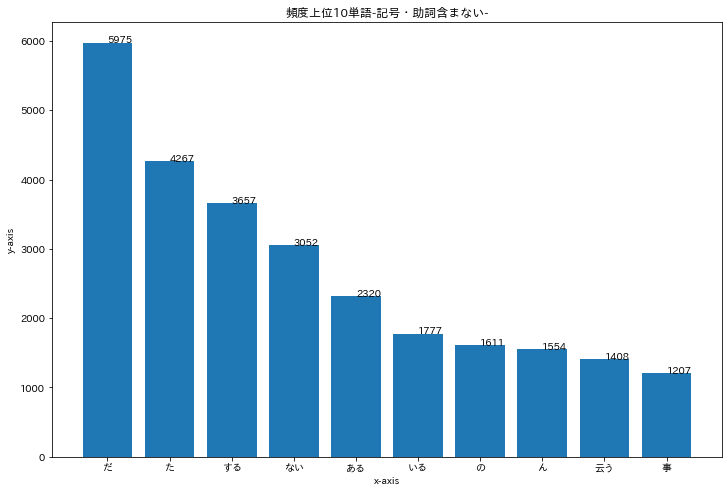

In [14]:
#36. 頻度上位10語 (助詞と記号は含まない)

from matplotlib import pyplot as plt
import japanize_matplotlib

x = []
y = []
H = []
counter = 0
for k,v in SortedDic.items():
    if counter < 10:
        x.append(k)
        y.append(v)

    counter += 1

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i])

print(x, y)

plt.figure(figsize=(12,8))
plt.bar(x, y)
plt.title("頻度上位10単語-記号・助詞含まない-")
add_value_label(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

['の', '。', 'て', '、', 'は', 'に', 'を', 'だ', 'と', 'が'] [9194, 7486, 6848, 6772, 6420, 6243, 6071, 5975, 5508, 5337]


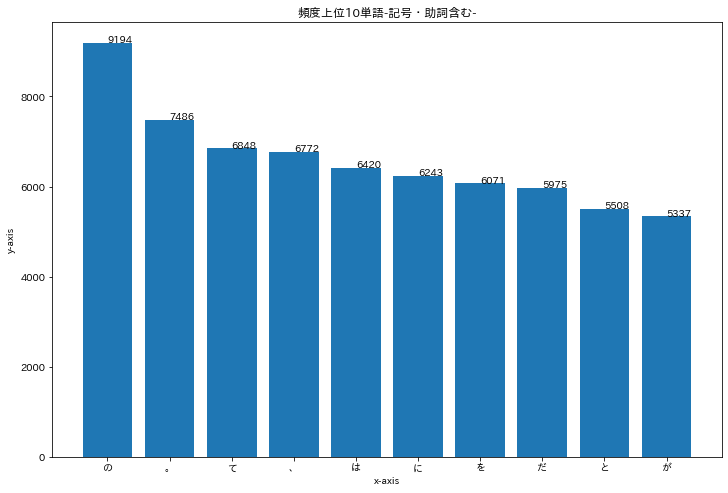

In [15]:
#35. 単語の出現頻度(記号等含む全単語)

import pprint

WordFreqDic = {}
for i in range(len(novel)):
    for j in range(len(novel[i])):
        word = novel[i][j]["base"]
        if word not in WordFreqDic:
            WordFreqDic[word] = 1
        else:
            WordFreqDic[word] += 1


SortedDic = dict(sorted(WordFreqDic.items(), key=lambda x:x[1], reverse=True))

x = []
y = []
H = []
counter = 0
for k,v in SortedDic.items():
    if counter < 10:
        x.append(k)
        y.append(v)

    counter += 1

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i])

print(x, y)

plt.figure(figsize=(12,8))
plt.bar(x, y)
plt.title("頻度上位10単語-記号・助詞含む-")
add_value_label(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

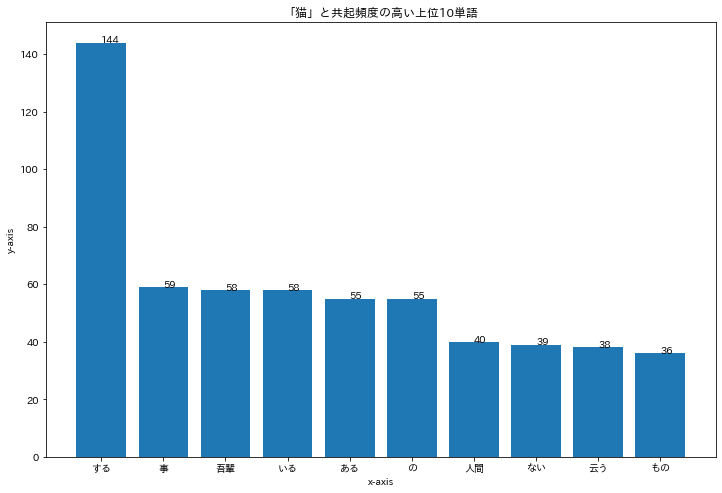

In [16]:
#37. 「猫」と共起頻度の高い上位10語

from collections import Counter
import pprint

NekoKyoki = []
WordList = []
Choose = ["動詞", "名詞", "形容詞"]
for i in range(len(novel)):
    for j in range(len(novel[i])):
        if (novel[i][j]["base"] != "*") and (novel[i][j]["pos"] in Choose):
            WordList.append(novel[i][j]["base"])
        elif (novel[i][j]["base"] == "*"):
            WordList.append(novel[i][j]["surface"])

    if "猫" in WordList:
        WordList.remove("猫")
        for k in range(len(WordList)):
            NekoKyoki.append(WordList[k])
    
    WordList = []
result = Counter(NekoKyoki)
SortedResult = dict(sorted(result.items(), key=lambda x:x[1], reverse=True))
#print(SortedResult)


x = []
y = []
counter = 0

for k,v in SortedResult.items():
    if counter < 10:
        x.append(k)
        y.append(v)
    counter += 1

plt.figure(figsize=(12,8))
plt.bar(x, y)
plt.title("「猫」と共起頻度の高い上位10単語")
add_value_label(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

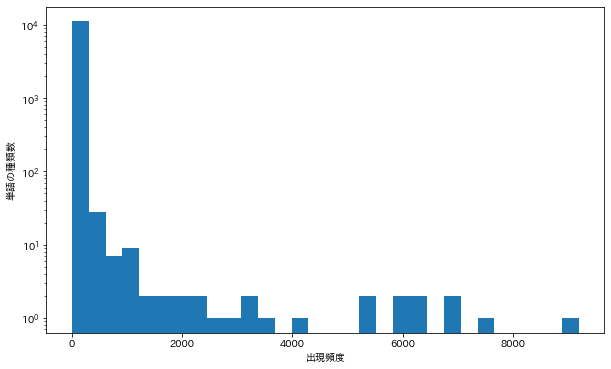

In [17]:
#38. ヒストグラム

import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))  # 画像サイズを指定
plt.hist(SortedDic.values(), bins=30, log=True) 
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.show()

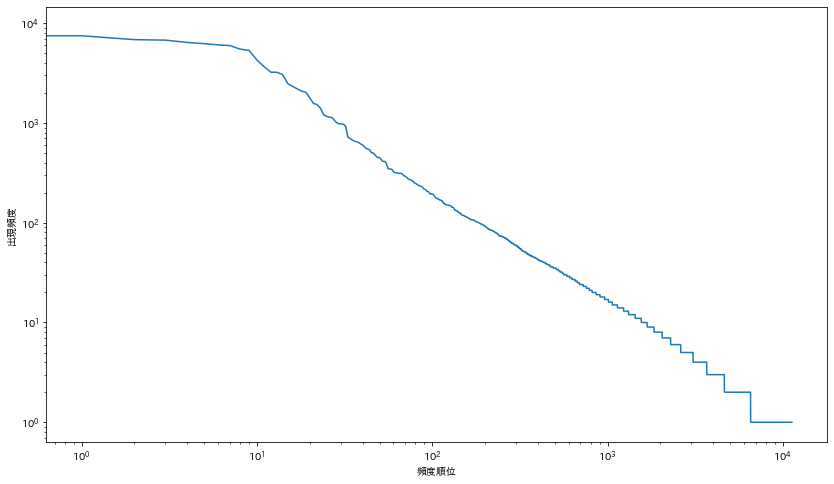

In [18]:

#39. Zipfの法則

x = []
y = []
for k,v in SortedDic.items():
    x.append(k)
    y.append(v)



plt.figure(figsize=(14,8))
plt.plot(x, y)

ax = plt.gca()
ax.set_yscale('log')  # y軸をlogスケールで描く
ax.set_xscale('log')  # x軸をlogスケールで描く
plt.xlabel("頻度順位")
plt.ylabel("出現頻度")
plt.show()